Deskriptive Statistik Warengruppen

In [1]:
import pandas as pd

# If the CSV is in a specific subdirectory
df = pd.read_csv('/workspaces/MA-bakery-sales-prediction/0_DataPreparation/df_merged_umsatz_kiwo_wetter.csv')

# To verify the import worked
print(df.head())

        Datum  Warengruppe      Umsatz  KielerWoche  Bewoelkung  Temperatur  \
0  2013-07-01            1  148.828353          NaN         6.0     17.8375   
1  2013-07-02            1  159.793757          NaN         3.0     17.3125   
2  2013-07-03            1  111.885594          NaN         7.0     21.0750   
3  2013-07-04            1  168.864941          NaN         7.0     18.8500   
4  2013-07-05            1  171.280754          NaN         5.0     19.9750   

   Windgeschwindigkeit  Wettercode  
0                 15.0        20.0  
1                 10.0         NaN  
2                  6.0        61.0  
3                  7.0        20.0  
4                 12.0         NaN  


In [2]:
# Descriptive statistics for the Warengruppe column
print(df['Warengruppe'].describe())

# If you want to get value counts (frequency of each unique value)
print(df['Warengruppe'].value_counts())

count    9334.000000
mean        3.088172
std         1.489002
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: Warengruppe, dtype: float64
Warengruppe
1    1819
2    1819
3    1819
5    1819
4    1766
6     292
Name: count, dtype: int64


Mittelwert etc. ergeben bei Warengruppe als nominaler Variable keinen Sinn. 

Es gibt 6 Warengruppen; 1, 2, 3 und 5 sind für 1.819 (alle?) Tage enthalten, 4 und 6 für weniger Tage (WE, Kiwo?). 

In [3]:
# Grouping by Warengruppe and getting summary statistics for other numerical columns
print(df.groupby('Warengruppe')['Umsatz'].describe())

              count        mean         std         min         25%  \
Warengruppe                                                           
1            1819.0  122.142509   40.299209   23.108406   96.436728   
2            1819.0  402.497911  139.660208  174.999832  289.050638   
3            1819.0  163.340920   75.578308   37.739245  105.589349   
4            1766.0   87.954042   35.318400   27.433726   66.024297   
5            1819.0  276.795509   99.472740  121.493282  228.972912   
6             292.0   66.916635   32.372569    7.051201   41.559645   

                    50%         75%          max  
Warengruppe                                       
1            120.053295  144.264423   416.788764  
2            370.834527  492.837815  1203.431130  
3            142.808943  201.950786   565.941679  
4             79.986363   98.345934   430.500089  
5            265.958912  307.620893  1879.461831  
6             62.909351   86.238825   172.865985  


Umsatz pro Warengruppe

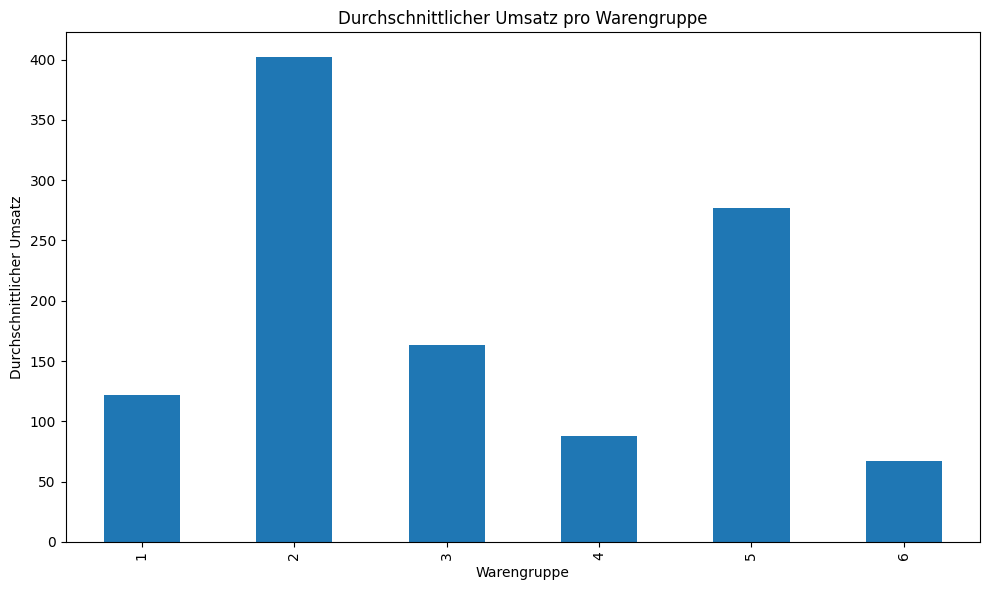

In [4]:
import matplotlib.pyplot as plt

# Calculate mean Umsatz by Warengruppe
umsatz_by_warengruppe = df.groupby('Warengruppe')['Umsatz'].mean()

# Create bar plot
plt.figure(figsize=(10, 6))
umsatz_by_warengruppe.plot(kind='bar')
plt.title('Durchschnittlicher Umsatz pro Warengruppe')
plt.xlabel('Warengruppe')
plt.ylabel('Durchschnittlicher Umsatz')
plt.tight_layout()
plt.show()

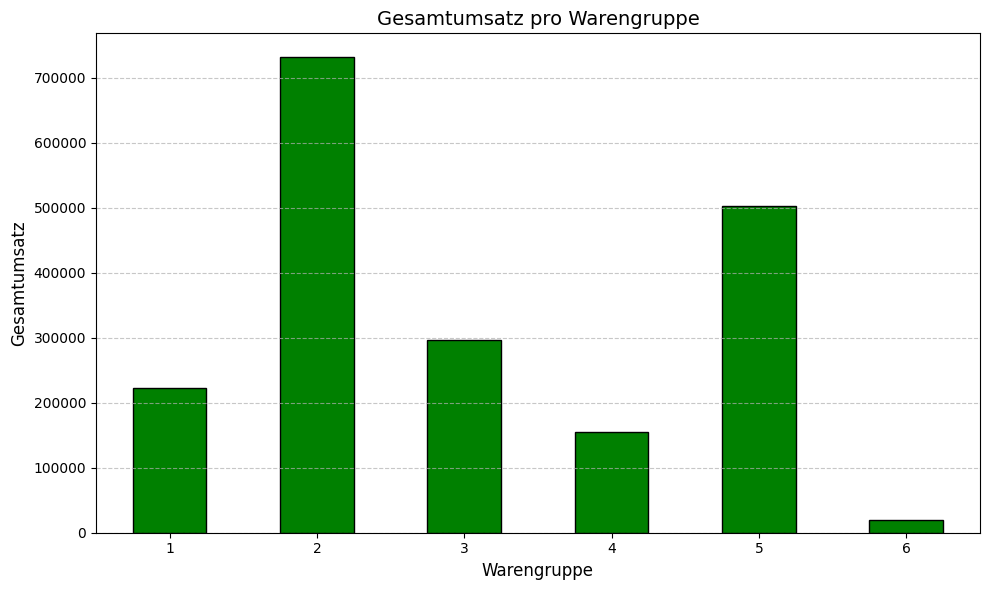

Gesamtumsatz pro Warengruppe:
Warengruppe
1    222177.223458
2    732143.699518
3    297117.132705
4    155326.837913
5    503491.030149
6     19539.657423
Name: Umsatz, dtype: float64


In [5]:
import matplotlib.pyplot as plt

# Calculate total Umsatz by Warengruppe
gesamtumsatz_by_warengruppe = df.groupby('Warengruppe')['Umsatz'].sum()

# Create bar plot
plt.figure(figsize=(10, 6))
gesamtumsatz_by_warengruppe.plot(kind='bar', color='green', edgecolor='black')
plt.title('Gesamtumsatz pro Warengruppe', fontsize=14)
plt.xlabel('Warengruppe', fontsize=12)
plt.ylabel('Gesamtumsatz', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print the exact values
print("Gesamtumsatz pro Warengruppe:")
print(gesamtumsatz_by_warengruppe)


Statistiken für numerische Variablen pro Warengruppe:
                 Umsatz                         Temperatur            \
                   mean      median         std       mean    median   
Warengruppe                                                            
1            122.142509  120.053295   40.299209  12.207780  12.04375   
2            402.497911  370.834527  139.660208  12.207780  12.04375   
3            163.340920  142.808943   75.578308  12.207780  12.04375   
4             87.954042   79.986363   35.318400  12.165856  12.00000   
5            276.795509  265.958912   99.472740  12.207780  12.04375   
6             66.916635   62.909351   32.372569   6.720569   6.37500   

                      Windgeschwindigkeit                  Bewoelkung         \
                  std                mean median       std       mean median   
Warengruppe                                                                    
1            7.260730           10.996696   10.0  4.1289

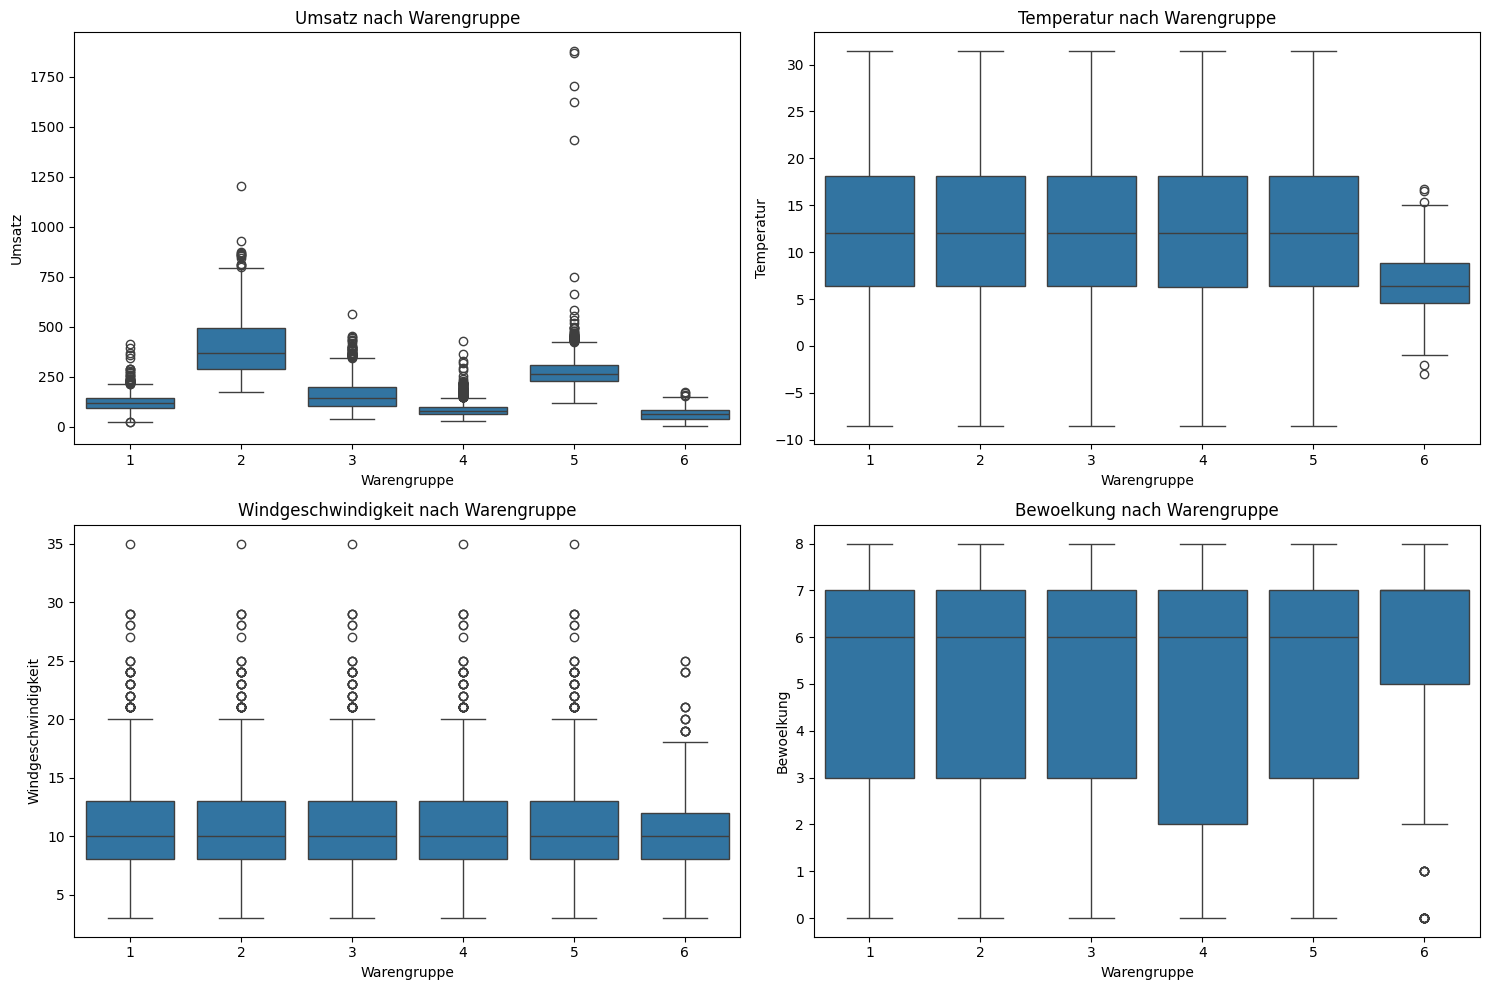

In [6]:
# Descriptive statistics for numerical variables by Warengruppe
print("\nStatistiken für numerische Variablen pro Warengruppe:")
numerical_vars = ['Umsatz', 'Temperatur', 'Windgeschwindigkeit', 'Bewoelkung']
grouped_stats = df.groupby('Warengruppe')[numerical_vars].agg(['mean', 'median', 'std'])
print(grouped_stats)

# Visualization of distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Warengruppe', y=var, data=df)
    plt.title(f'{var} nach Warengruppe')
plt.tight_layout()
plt.show()

Das einzig sinnvolle davon dürfte Umsatz nach Warengruppe sein, der Rest sind unabhängige Variablen.

Korrelationen und Mittelwertunterschiede pro Warengruppe:
   Temperatur_Korrelation  KielerWoche_Mittelwertunterschied
1                0.228403                          14.254671
2                0.566486                         139.531730
3                0.622965                          61.504155
4               -0.117133                          -6.965463
5                0.165250                          39.910519
6               -0.284368                                NaN


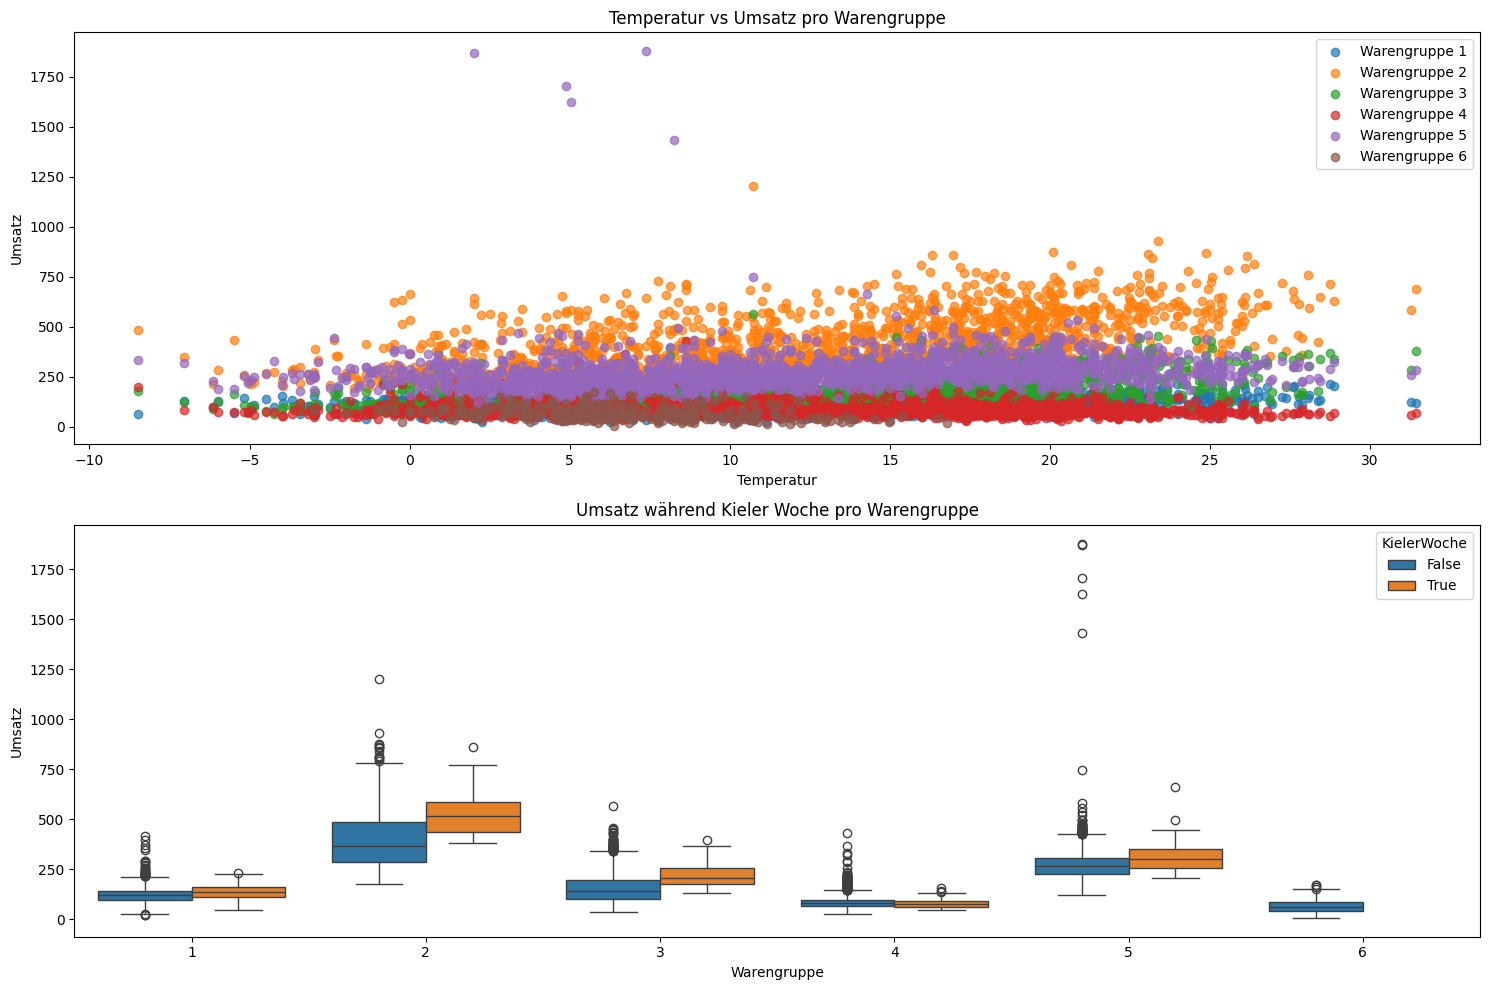


T-Test Ergebnisse für Kieler Woche:
   t_statistic       p_value
1     2.346199  1.907295e-02
2     6.697981  2.808704e-11
3     5.433179  6.282787e-08
4    -1.277639  2.015448e-01
5     2.662417  7.826610e-03
6          NaN           NaN


/tmp/ipykernel_46655/890388898.py:68: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = stats.ttest_ind(kw_umsatz, non_kw_umsatz)


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert KielerWoche to boolean (True/False)
df['KielerWoche'] = df['KielerWoche'].notna()

# Function to calculate correlations for each Warengruppe
def correlate_by_warengruppe(dataframe):
    results = {}
    for gruppe in dataframe['Warengruppe'].unique():
        gruppe_data = dataframe[dataframe['Warengruppe'] == gruppe]
        
        # Correlation with Temperatur
        temp_corr = gruppe_data['Temperatur'].corr(gruppe_data['Umsatz'])
        
        # Correlation with KielerWoche (point-biserial correlation)
        kw_corr = gruppe_data['Umsatz'][gruppe_data['KielerWoche']].mean() - \
                  gruppe_data['Umsatz'][~gruppe_data['KielerWoche']].mean()
        
        results[gruppe] = {
            'Temperatur_Korrelation': temp_corr,
            'KielerWoche_Mittelwertunterschied': kw_corr
        }
    
    return pd.DataFrame.from_dict(results, orient='index')

# Calculate and print correlations
correlation_results = correlate_by_warengruppe(df)
print("Korrelationen und Mittelwertunterschiede pro Warengruppe:")
print(correlation_results)

# Visualization
plt.figure(figsize=(15, 10))

# Scatter plot: Temperatur vs Umsatz for each Warengruppe
plt.subplot(2, 1, 1)
for gruppe in df['Warengruppe'].unique():
    gruppe_data = df[df['Warengruppe'] == gruppe]
    plt.scatter(gruppe_data['Temperatur'], gruppe_data['Umsatz'], 
                label=f'Warengruppe {gruppe}', alpha=0.7)
plt.title('Temperatur vs Umsatz pro Warengruppe')
plt.xlabel('Temperatur')
plt.ylabel('Umsatz')
plt.legend()

# Box plot: Umsatz during Kieler Woche vs Non-Kieler Woche
plt.subplot(2, 1, 2)
sns.boxplot(x='Warengruppe', y='Umsatz', hue='KielerWoche', data=df)
plt.title('Umsatz während Kieler Woche pro Warengruppe')
plt.xlabel('Warengruppe')
plt.ylabel('Umsatz')

plt.tight_layout()
plt.show()

# Statistical test for Kieler Woche impact
from scipy import stats

def kieler_woche_ttest(dataframe):
    results = {}
    for gruppe in dataframe['Warengruppe'].unique():
        gruppe_data = dataframe[dataframe['Warengruppe'] == gruppe]
        kw_umsatz = gruppe_data['Umsatz'][gruppe_data['KielerWoche']]
        non_kw_umsatz = gruppe_data['Umsatz'][~gruppe_data['KielerWoche']]
        
        # Perform t-test
        t_stat, p_value = stats.ttest_ind(kw_umsatz, non_kw_umsatz)
        
        results[gruppe] = {
            't_statistic': t_stat,
            'p_value': p_value
        }
    
    return pd.DataFrame.from_dict(results, orient='index')

# Perform t-test and print results
t_test_results = kieler_woche_ttest(df)
print("\nT-Test Ergebnisse für Kieler Woche:")
print(t_test_results)

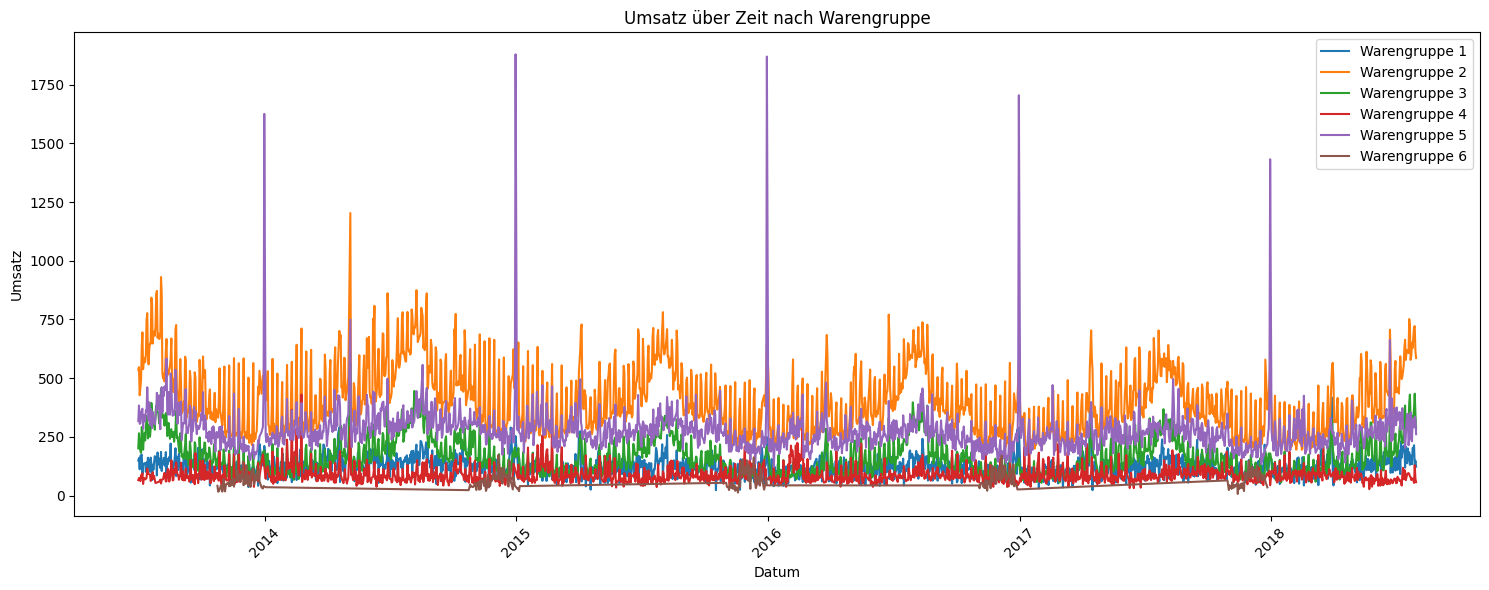

In [8]:
# Convert Datum to datetime
df['Datum'] = pd.to_datetime(df['Datum'])

# Umsatz by Warengruppe over time
plt.figure(figsize=(15, 6))
for gruppe in df['Warengruppe'].unique():
    gruppe_data = df[df['Warengruppe'] == gruppe]
    plt.plot(gruppe_data['Datum'], gruppe_data['Umsatz'], label=f'Warengruppe {gruppe}')
plt.title('Umsatz über Zeit nach Warengruppe')
plt.xlabel('Datum')
plt.ylabel('Umsatz')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()